In [1]:
%matplotlib notebook

# Advanced Python Programming

Dr. Martin Wolf, Tomas Kontrimas

Advanced Python Programming, WS 2022/23

In [2]:
class Word:
    def __init__(self, word):
        self.word = word
    def __add__(self, rhs):
        return Word(self.word + ' ' + str(rhs))
    def __str__(self):
        return self.word
    
hello = Word('Hello')
world = Word('World')
print(hello + world)

Hello World


# Learning objectives of this course

* Understanding the concepts of object-oriented programming (OOP), in particular in Python
* Understanding inheritance in OOP
* Some useful software packages for data processing and plotting
* Working with version-control systems like `git` and `github.com`

# Technical Prerequisites Of This Course

* Computer with Python and Jupyter Notebook support

    - Linux, Windows, Mac
    
* Alternatively, create and use Jupyter notebooks on google: https://colab.research.google.com
    
* *github.com* account

# Why do we need to be able to develop software, in particular in physics?

* For most of our professional time we work with ...

    * data taking
    * data simulation
    * data management
    * data selection
    * data analysis
    
* All of the above needs software that is ...

    * efficient
    * modular
    * well maintainable
    * scalable

**Example: Trigger rate of the IceCube Neutrino Detector at South Pole:**

![Trigger rate of the Icecube Neutrino Detector at South Pole](figures/icecube_trigger_rate.png)

# Overview

DON'T PANIC!

Just read the instructions:
<https://docs.python.org/3/>

Google is your friend!

## Intro and course setup
* Jupyter Notebook and virtual Python environments on your own computer
* Jupyter Notebook on Google Colab

## The basics of Python (recap)
* Data types in Python
* Python as a calculator
* String formatting
* Loops and Conditions
* List comprehension
* Working with files
* Functions
* Lambda functions

## Advanced basics of Python
* Exceptions
* Decorators
* Nested functions
* PEP8 Coding Style
* Common pitfalls

## Object-Oriented Programming (OOP)
* Classes
* Properties
* Class methods
* Static methods
* Operator methods
* Inheritance
* Multiple inheritance
* Abstract base classes
* Iterator protocol
* Generators

## Advanced packages
* `numpy` for data processing
* `pandas` for structural data processing
* `matplotlib` for plotting

## Working with version control systems (git)
* What is a version control system?
* What is `git`?
* Cloning a repository
* Working with branches
* Commiting code changes
* Merging two branches
* Resolving merge conflicts
* Pull requests on github.com

# Jupyter Notebook and virtual Python environments on your own computer

This shows the installation of Jupyter and Python virtual environments on Linux (Ubuntu).

First, let's install Jupyter via `apt-get`:

```bash
sudo apt-get install python3-notebook python3-ipykernel
```

For this course, I recommend to setup a dedicated virtual Python 3 environment:
    
```bash
sudo apt-get install virtualenvwrapper
source /usr/share/virtualenvwrapper/virtualenvwrapper.sh
```
  
The environment is created via:
  
```bash
mkvirtualenv -p /usr/bin/python3 --system-site-packages adv-py3-course
pip install -U astropy matplotlib numpy scipy
```

The final step is to add the virtual Python environment to Jupyter Notebook:

```bash
python -m ipykernel install --user \
    --name adv-py3-course --display-name "Python 3 (adv-py3-course)"
```

I further recommend to put the

```bash
source /usr/share/virtualenvwrapper/virtualenvwrapper.sh
```

line into your `.profile` and launch a new terminal window.

You can start a Jupyter Notebook via:

```bash
jupyter notebook
```

and create a new `adv-py3-course` notebook.

For executing Python scripts, you can activate the `adv-py3-course` environment via:

```bash
workon adv-py3-course
```

and deactivate it via:

```bash
deactivate
```

# Jupyter Notebook on Google Colab

* Go to https://colab.research.google.com and create a new notebook
* To install new packages, type `!pip install <package>`

# The basics of Python

* Python is an interpreted (no compilation) and loosely typed programming language.
* The latest major version of Python is **Python3**. Don't use Python2 anymore!

In [3]:
%matplotlib notebook

In [4]:
# Comments start with '#'.

In [5]:
# Import modules.
import os

import matplotlib.pyplot
import numpy as np

In [6]:
# Import only specific functions from a module.
from __future__ import print_function, division

In [7]:
# Remember: never ever do 'from foo import *'

In [8]:
# Declare a variable.
a = 5.
a = "Hello World!"

## Data types

* Numeric types:  
  `int, float, complex`
* Sequence types:  
  `str, unicode, list, tuple, bytearray, buffer`
* Set types:  
  `set, frozenset`
* Map types:  
  `dict`
* Boolean types:
  `bool`
* The None type object: `None`
* Mutable data types like `list` and `dict` are copied by reference.
* Immutable data types like `int` and `float` are copied by value.
* Full list:  
  <https://docs.python.org/3.7/library/stdtypes.html#>

## Python as a calculator

In [9]:
# Addition and substraction
print("5.  + 5. =", 5. + 5.)
print("10. - 5. =", 10. - 5.)

5.  + 5. = 10.0
10. - 5. = 5.0


In [10]:
# Multiplication and division
print("5.  * 5. =", 5. * 5.)
print("25. / 5. =", 25. / 5.)

5.  * 5. = 25.0
25. / 5. = 5.0


In [11]:
# Modulo and exponentiation
print("25. % 4. =", 25. % 4.)
print("5.**2    =", 5.**2)

25. % 4. = 1.0
5.**2    = 25.0


In [12]:
# Do calculations with variables.
a = 5.
print("a + 5. =", a + 5.)

a + 5. = 10.0


In [13]:
b = 4.
c = a + b
print("c = a + b =", c)

c = a + b = 9.0


In [14]:
# In-place modifications
a += 5.
print("a =", a)

a = 10.0


In [15]:
# Call mathematical functions like sin, exp, log, ...
# Instead of NumPy, you can also use the 'math' module.
print("exp(2.5)   =", np.exp(2.5))
print("sin(pi/2.) =", np.sin(np.pi/2.))

exp(2.5)   = 12.182493960703473
sin(pi/2.) = 1.0


## String formatting

General form:

```
[fill][align][sign][#][0][width][,][.precision][type]
```

See:  
<https://docs.python.org/3/library/string.html#format-string-syntax>

In [16]:
# Some examples
print("{:>+10.2f}".format(np.pi))
print("{:010d}".format(3))

     +3.14
0000000003


In [17]:
# Some more examples
s = "{0}, {1[0]}, {1[1]}, {2[a]}"
print(s.format(0, [1, 2], {"a": 3}))
print("{key}".format(key=4))

0, 1, 2, 3
4


F-string (formatted string literal) introduced in Python 3.6 supports the same sting formatting form as `.format()`.
They can embed Python expressions directly inside them using `f"string example {expression:format}"` syntax.

In [18]:
# f-string examples
a = 10.5
print(f"a = {a}")
print(f"a = {a:.0f}")
print(f"Evaluate some code: {5*5:.2f}")
print(f"Evaluate some more code: {np.sqrt(9):.0f}")

a = 10.5
a = 10
Evaluate some code: 25.00
Evaluate some more code: 3


## Loops and Conditions

In [19]:
# Example for-loop with conditions
for i in range(3):
    if i == 0:
        print("Skip 0.")
    elif i % 2 > 0:
        print("{} is an odd  number.".format(i))
    else:
        print("{} is an even number.".format(i))

Skip 0.
1 is an odd  number.
2 is an even number.


In [20]:
# Example while-loop
d = {"a": 0, "b": 1}

while len(d) > 0:
    d.popitem()

* You can break out of a loop via `break`.
* Iterations can be skipped via `continue`.
* Remember that Python does not really know about scopes.

## List comprehension

An easy way to create iterables from existing ones.

In [21]:
# List comprehension examples
l = [i**2 for i in range(10)]
l = [10. / i for i in range(10) if i > 0]
l = [10. / i if i > 0 else np.inf for n in range(10)]
l = [[a*i for a in [1, 2]] for i in range(1, 11)]

In [22]:
# The same works for dictionaries.
d = {"a": 2., "b": 3.}
d = {k: v**2 for k, v in d.items()}

In [23]:
# And of course sets
s = {i**2 for i in range(10)}

In [24]:
# Some generator magic
g = (i**2 for i in range(10))
r = sum(g)

# We can also do this in one line.
print(sum(i**2 for i in range(10)))

285


## Working with files

In [25]:
# Create a text file and give it some input.
with open("example.txt", "w") as stream:
    stream.write("This is a line.\n")
    stream.write("This is another line.")

In [26]:
# Read the content of the text file.
with open("example.txt", "r") as stream:
    lines = stream.readlines()
    
print("".join(lines))

This is a line.
This is another line.


In [27]:
os.remove("example.txt")

## Functions

In [28]:
# A simple function that takes two arguments.
def power(a, e=2.):
    r"""Exponentiation
    
    Calculate: ``a**e``.
    
    Parameters
    ----------
    a : float
        Some number
    e : float, optional
        Exponent
        
    Returns
    -------
    float
        Result of ``a**e``
    
    """
    return a**e

In [29]:
print("5.**2 =", power(5.))

5.**2 = 25.0


In [30]:
# Alternative ways to call the function
results = [
    power(5., 2.),
    power(5., e=2.),
    power(a=5., e=2.),
    power(e=2., a=5.),
    power(*[5., 2.]),
    power(**{"a": 5., "e": 2.})
    ]

In [31]:
print("Results:", ", ".join("{}".format(r) for r in results))

Results: 25.0, 25.0, 25.0, 25.0, 25.0, 25.0


In [32]:
# General syntax
def func(*args, **kwargs):
    print(f'args: {args}')
    print(f'kwargs: {kwargs}')

In [33]:
func(3 ,'a', a=2, b='1')

args: (3, 'a')
kwargs: {'a': 2, 'b': '1'}


A few words about doc strings:

* **Do write** them because they help to better understand your code.
* We recommend the NumPy style:  
  <https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_numpy.html>

## Lambda functions

Lambdas are unnamed in-line functions.

In [34]:
# Example for lambda usage
print(sorted("String"))
print(sorted("String", key=lambda s: s.lower()))

['S', 'g', 'i', 'n', 'r', 't']
['g', 'i', 'n', 'r', 'S', 't']


In [35]:
# A lambda function can be assigned to a variable.
square = lambda x: x**2
print("5**2 =", square(5.))

5**2 = 25.0


## Exceptions

In [36]:
# Write a function that can raise an exception.
def division(a, b):
    r"""Divide `a` by `b`.
    
    Parameters
    ----------
    a,b : float
        Nominator and denominator
        
    Returns
    -------
    float
        The result of ``a/b``
        
    Raises
    ------
    ValueError
        If the denominator `b` is zero.
    """
    if np.fabs(b) > 0.:
        return a / b
    else:
        raise ValueError("The denominator should not be zero.")

In [37]:
# Catch the exception.
try:
    r = division(5., 0.)
except ValueError as e:
    print(e)
    r = np.inf
finally:
    print("The result is {}.".format(r))

The denominator should not be zero.
The result is inf.


A full list of built-in exceptions can be found here:  
<https://docs.python.org/3/library/exceptions.html>

The most common exception types that one wants to raise are:
* `TypeError`
* `ValueError`
* `NameError`
* `IndexError`
* `KeyError`
* `NotImplementedError`

## Decorators

Decorators are syntactic sugar for functions that are *decorating* other functions.

* Decorator functions take a **callable** as argument.
* Decorator functions should call the given callable argument.

In [38]:
# Example of a simple decorating function.
def paragraph(f):
    return lambda name: "<p>{}</p>".format(f(name))

In [39]:
@paragraph
def greet(name):
    return "Hello {}, how are you?".format(name)

In [40]:
print(greet("John"))

<p>Hello John, how are you?</p>


## Nested functions

Python allows to define functions within functions.

* Can be used to "configure" a function object.
* Inner function gets scope of outer function.

In [41]:
def preparing_to_feed_cat(what_to_feed):
    
    def feed_cat(how_much_to_feed):
        msg = f"I'm feeding my cat with {how_much_to_feed} {what_to_feed}."
        return msg
        
    return feed_cat

# Create a function object that knows what to feed the cat with.
feed_cat_func = preparing_to_feed_cat(what_to_feed='cans of meat')

print(feed_cat_func(how_much_to_feed=3))

I'm feeding my cat with 3 cans of meat.


## PEP8 Coding style

Please stick to the 'official' style guide for Python code:  
<https://www.python.org/dev/peps/pep-0008/>

Useful software tools:
- [flake8](https://flake8.pycqa.org/en/latest/) is a popular linter for python. It checks against PEP8 coding style and for programming errors.
- [black](https://black.readthedocs.io/en/stable/index.html) is the uncompromising Python code formatter. It automatically formats code to conform to the PEP8 compliant coding style.

## Common pitfalls

The Python language has some particular properties that might lead to some not-so obvious pitfalls.

* Objects are passed by reference (not by copy!)
    * except scalar data types like int, float, complex

In [42]:
a = 42
def f(b):
    b = 11
f(a)
print(a)

42


The scalar variable is passed as copy.

In [43]:
a = [42]
def f(b):
    c = b
    c.append(11)
f(a)
print(a)

[42, 11]


The list `a` is passed as reference. Hence, `b` referes to the same object `a` in memory. The same applies for name changes of variables. `c` refers to the same object as `b`.

* Function keyword argument default values are instanciated only once
    * lists as keyword argument default values can be tricky

In [44]:
def f(a=[0]):
    # Append a new element with the value as
    # the maximum of all list values plus 1.
    a.append(max(a) + 1)
    return a

In [45]:
print(f())

[0, 1]


In [46]:
print(f())

[0, 1, 2]


The function changes the one-and-only list object that was instantiated as default keyword argument value.

## Object-Oriented Programming (OOP)

From Wikipedia:
    
    Object-oriented programming (OOP) is a programming paradigm based on the concept of "objects", which can
    contain data and code: data in the form of fields (often known as attributes or properties), and code,
    in the form of procedures (often known as methods).

In contrast to sequential global programming, object-oriented programming allows to encapsulate sets of functionalities into classes.

Classes can be instantiated as **instances**, i.e. objects of a particular class.

Example:

Given class `Animal`, the object `cat` and object `dog` could be instances of class `Animal`. 

The class `Animal` can have data fields, i.e. properties, like `name`, and `color`.

## Classes

* A class is an object in Python, i.e. a **class object**.
* A class always has a **constructor**.
* A class can have **attributes**.
    * In Python everything is accessible, i.e. **public**.
    * Convention: Private attributes start with an underscore (`_`). 
* A class can have **instance methods** (functions of the class available to an instance of the class).
* A class can have **class methods** (functions of the class available to the class object and an instance of the class).
* A class can have **special methods** like `__str__`.
* Classes can be derived from other classes (one or many) (see inheritance).

In [47]:
# A not very useful class.
class MyClass(object):
    pass

In [48]:
# MyClass is a class object!
# Let's look at its attributes:
dir(MyClass)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [49]:
# A simple class with a constructor, two attributes, and a special method.
class Direction(object):
    r"""Direction
    
    Directional vector in spherical coordinates 
    
    Attributes
    ----------
    azimuth : float
        Azimuth angle in rad
    zenith : float
        Zenith angle in rad
    
    """
    def __init__(self, azimuth, zenith):
        """This is the constructor method.
        """
        self.azimuth = azimuth
        self.zenith = zenith
        
    def __str__(self):
        """This is a special class method to generate output for `str(obj)`.
        """
        return f"({self.azimuth}, {self.zenith})"

In [50]:
d = Direction(np.pi/3., np.pi/2.)
print("Direction:", d)

Direction: (1.0471975511965976, 1.5707963267948966)


## Properties

* Properties tie data attributes to setter, getter, deleter methods.
    * Allows for data attribute control

In [51]:
class A(object):
    r"""Class `A` with the property `a`, which must be a positive number.
    """
    def __init__(self):
        self._a = 0
    
    @property
    def a(self):
        r"""int: A positive number
        """
        return self._a
    
    @a.setter
    def a(self, val):
        if val >= 0:
            self._a = val
        else:
            raise ValueError(
                "Expect a positive number.")

In [52]:
a = A()
a.a = 42
print(a.a)

42


In [53]:
a.a = -1

ValueError: Expect a positive number.

## Instance methods

Instance methods have the reference `self` to the class instance as first argument. By definition the constructor method is an instance method as well.

In [54]:
class A(object):
    r"""A class with an instance method.
    """
    def __init__(self, a):
        self.a = a

a = A(42)
print(a.a)

42


## The @classmethod decorator

The `@classmethod` decorator defines **class methods**. Class methods have a reference to a class object as first argument, i.e. a reference to the class object of the class instance itself. This allows for example to implement more than one constructor for a class.

In [55]:
class A(object):
    r"""A class with class method.
    
    """
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def __str__(self):
        return "a = {o.a}, b = {o.b}".format(o=self)
    
    @classmethod
    def from_tuple(cls, t):
        return cls(t[0], t[1])

In [56]:
a = A.from_tuple((1., 2.))
print(a)

a = 1.0, b = 2.0


## The @staticmethod decorator

The `@staticmethod` decorator defines static methods. Static methods can have no arguments at all. Static methods live inside the namespace of a class object. They can be called either from the class object or an instance of the class.

In [57]:
class Angle(object):
    r"""A class with a static method
    
    """
    def __init__(self, value=0.):
        self.value = value
    
    @staticmethod
    def deg2rad(angle):
        return angle * np.pi / 180.

In [58]:
print("30deg = {:.2f}rad".format(Angle.deg2rad(30.)))

30deg = 0.52rad


In [59]:
a = Angle()
print("30deg = {:.2f}rad".format(a.deg2rad(30.)))

30deg = 0.52rad


## Operator methods

* Python classes define magic methods for implementing operators, like `+`, `-`, `*`, etc.
* See [emulating numeric types](https://docs.python.org/3/reference/datamodel.html#emulating-numeric-types) for a full list of possible operators.
* Binary arithmetic operators:
    
    * `+`: `__add__(self, rhs)`
    * `-`: `__sub__(self, rhs)`
    * `*`: `__mul__(self, rhs)`
    * `/`: `__div__(self, rhs)`
    * `@`: `__matmul__(self, rhs)`
    * `%`: `__mod__(self, rhs)`
    * `&`: `__and__(self, rhs)`
    * `|`: `__or__(self, rhs)`
* Reflected (swapped) binary operators use `__r<op>__(self, lhs)`, e.g. `__radd__(self, lhs)`.

In [60]:
# Example for addition operator:
class Text(object):
    def __init__(self, value):
        self.value = value
    def __add__(self, rhs):
        return Text(self.value + str(rhs))
    def __str__(self):
        return self.value
    
t1 = Text('Hello')
t2 = Text(' ')
t3 = Text('World')

print(t1 + t2 + t3)
print(t1 + ' ' + t3)
print('Hello' + t2 + t3)

Hello World
Hello World


TypeError: can only concatenate str (not "Text") to str

The last expression `print('Hello' + t2 + t3)` can be supported via a reflected add operator:

In [61]:
# Example for addition operator with reflected addition operator:
class Text(object):
    def __init__(self, value):
        self.value = value
    def __add__(self, rhs):
        return Text(self.value + str(rhs))
    def __radd__(self, lhs):
        return Text(str(lhs) + self.value)
    def __str__(self):
        return self.value
    
t2 = Text(' ')
t3 = Text('World')

print('Hello' + t2 + t3)

Hello World


* Rich comparison operators and their corresponding magic class methods:
    * `>`: `__gt__(self, rhs)`
    * `>=`: `__ge__(self, rhs)`
    * `<`: `__lt__(self, rhs)`
    * `<=`: `__le__(self, rhs)`
    * `==`: `__eq__(self, rhs)`
    * `!=`: `__ne__(self, rhs)`
    * Should return `True` or `False`.
* Augmented arithmetic assignments (in-place operators): `__i<op>__(self, rhs)`, e.g. `__iadd__(self, rhs)`.
    * `+=`: `__iadd__(self, rhs)`
    * `-=`: `__isub__(self, rhs)`
    * `*=`: `__imul__(self, rhs)`
    * Should return the object itself.

## Inheritance

In order to evolve classes in OOP, **inheritance** exists. Classes can be **derived** from **base classes** and **inherit** their properties and methods. This way code can be reused and development time can be saved.

* Methods can be overwritten by derived classes.
* The `super()` function can be used to call methods of the parent class.

In [62]:
class Animal(object):
    """This is the base class.
    """
    def __init__(self, species, age):
        self.species = species
        self.age = age
        
    # Instance method.
    def description(self):
        print(f'{self.species} is {self.age} years old')

    @property
    def age(self):
        return self._age
    @age.setter
    def age(self, age):
        if age >= 0:
            self._age = age
        else:
            raise ValueError(
                f'Provided {age} age has to be a positive number.')

In [63]:
class Dog(Animal):
    """The Dog class is derived from the base class `Animal`.
    """
    def __init__(self, age):
        # Call the constructor of the parent class.
        # This first creates an animal object, which is then extended.
        super().__init__('dog', age)
        
class Cat(Animal):
    def __init__(self, age):
        super().__init__('cat', age)
    
    def description(self):
        """This methods overwrites the parent's description method.
        """
        print(f'I am a {self.species}')

In [64]:
dog = Dog(5)
dog.description()

dog is 5 years old


In [65]:
cat = Cat(6)
cat.description()

I am a cat


In [66]:
print(type(cat))
print(type(cat.age))
print(type(cat.description))

<class '__main__.Cat'>
<class 'int'>
<class 'method'>


### isinstance and issubclass

To check if an instance is of some class we can use the built-in function `isinstance()` which takes two arguments, an instance object and a class object and returns `True` if the given class is anywhere in the inheritance chain of the instance's class:

In [67]:
print(isinstance(cat, Cat))
print(isinstance(cat, Dog))
print(isinstance(cat, Animal))

True
False
True


We can also check if the given class is a subclass of another class with the built-in function `issublass()`.

In [68]:
print(issubclass(Cat, Animal))
print(issubclass(Cat, Cat))
print(issubclass(Cat, Dog))

True
True
False


## Multiple inheritance

* A class can be derived from more than one base class.
* The parent class constructor should always be called.
* Additional argumets `*args` and keyword arguments `**kwargs` need to be passed on to the parent.

In [69]:
class IsPuppy(object):
    def __init__(self, *args, **kwargs):
        # We need to call the parent's constructor
        # to call the constructor of ALL base classes of a derived class. 
        super().__init__(*args, **kwargs)

    def description(self):
        print(f'I am a puppy.')
        
class Puppy(Dog, IsPuppy):
    def __init__(self, age):
        super().__init__(age)

In [70]:
puppy_dog = Puppy(1)
puppy_dog.description()

dog is 1 years old


Python determines which description to call using *Method Resolution Order (MRO)*. We can check the order using the `mro()` method:

In [71]:
print(Puppy.mro())

[<class '__main__.Puppy'>, <class '__main__.Dog'>, <class '__main__.Animal'>, <class '__main__.IsPuppy'>, <class 'object'>]


Changing the MRO to call `IsPuppy`'s description first.

In [72]:
class Puppy(IsPuppy, Dog):
    def __init__(self, age):
        super().__init__(age)

In [73]:
print(Puppy.mro())

puppy_dog = Puppy(1)
puppy_dog.description()

[<class '__main__.Puppy'>, <class '__main__.IsPuppy'>, <class '__main__.Dog'>, <class '__main__.Animal'>, <class 'object'>]
I am a puppy.


## Abstract Base Classes

* Abstract base classes can be used to define **interfaces**.
* Methods can be declared *abstract* and must be implemented by derived classes before a class can be instantiated.
* The `abc` package provides abstract base class functionality.
    * See https://docs.python.org/3/library/abc.html
* Abstract base classes are defined by setting the class's `metaclass` keyword with `metaclass=abs.ABCMeta`.
* Abstract methods (instance methods, class methods, properties) are defined with `@abstractmethod` decorator.

In [74]:
import abc

class AnimalBase(object, metaclass=abc.ABCMeta):
    def __init__(self, species, age):
        self.species = species
        self.age = age

    # Abstract instance method.
    @abc.abstractmethod
    def description(self):
        # We use `pass` as a placeholder for the
        # implementation by the derived class.
        pass

    # Define age property with abstract setter method.
    @property
    def age(self):
        return self._age
    @age.setter
    @abc.abstractmethod
    def age(self, age):
        pass

Class derived from `abc.ABCMeta` cannot be instantiated unless all of its abstract methods and properties are implemented.

In [75]:
class Dog(AnimalBase):
    def __init__(self, age):
        super().__init__('dog', age)

In [76]:
dog = Dog(5)
dog.description()

TypeError: Can't instantiate abstract class Dog with abstract methods age, description

Lets fix it by implementing the `description` and `age` methods.

In [77]:
class Dog(AnimalBase):
    def __init__(self, age):
      super().__init__('dog', age)

    # Implement the description instance method.
    def description(self):
        print('I am the implementation of the description instance method.')
        print(f'The {self.species} is of age {self.age}.')
    
    # Implement the setter method of the age property.
    @AnimalBase.age.setter
    def age(self, age):
        if age < 0:
            print(f'Provided {age} age has to be positive number.')
            self._age = None
        else:
            self._age = age

In [78]:
dog = Dog(-5)
dog.description()

Provided -5 age has to be positive number.
I am the implementation of the description instance method.
The dog is of age None.


In [79]:
dog = Dog(2)
dog.description()

I am the implementation of the description instance method.
The dog is of age 2.


## Iterator protocol

If a class implements a container, the iterator protocol can be used to iterate over the items of the container. See <https://docs.python.org/3/library/stdtypes.html#iterator-types> for details.

The interator protocol consists of two special instance methods: `__iter__` and `__next__`.

The `__iter__` instance method must return the iterator object, usually the class instance itself.

The `iter()` built-in function can be used to get an iterator of an object.

The `__next__` instance method must return the next element of the container. If it raises the `StopIteration` exception, the iteration stops.

In [80]:
# Example of a container with the iterator protocol supported.
class MyBox(object):
    def __init__(self, items):
        self.items = items
    def __iter__(self):
        return MyBoxIterator(self)

# We define an iterator class that knows how to iterate through
# the items of the box.
class MyBoxIterator(object):
    def __init__(self, box):
        self.box = box
        # The index attribute points to the next item in the box.
        self.index = 0
    def __iter__(self):
        return self
    def __next__(self):
        # Check if we reached the end of the item sequence.
        if self.index == len(self.box.items):
            raise StopIteration()
        self.index += 1
        return self.box.items[self.index-1]

In [81]:
box = MyBox([8, 'a', 42, 'hello'])
for item in box:
    print(item)

8
a
42
hello


Our box class uses a sequence for storing the items. Sequences have iterators already implemented in Python, hence we can simplify the previous example by utilizing the iterator of the item sequence using the `iter()` built-in function.

In [82]:
class MySimpleBox(object):
    def __init__(self, items):
        self.items = items
    def __iter__(self):
        return iter(self.items)

In [83]:
box = MySimpleBox([8, 'a', 42, 'hello'])
for item in box:
    print(item)

8
a
42
hello


## Generators

### Recap:

There are a couple of useful extra functions for loops (also called generators). The two most common generators are:

*   `range(start (default=0), stop, stepsize (default=1))` -> creates a counting iterable, ie. 0, 1, 2, 3, ... stop. For a large number of iterations, range is much more memory-efficient than looping over the corresponding list of [0, 1, 2, ...], because the items are generated on the fly. 
*   `enumerate(iterable)` -> returns the index and the value of an iterable

For more info on where generators are useful and how to write your own generator functions, see e.g. https://realpython.com/introduction-to-python-generators/


### Generator function
A function which returns a generator iterator. It looks like a normal function except that it contains `yield` expressions for producing a series of values usable in a for-loop or that can be retrieved one at a time with the `next()` function.

In [84]:
def custom_range_generator(n):
    i = 0
    while i < n:
        yield i
        i += 1

In [85]:
range_generator = custom_range_generator(5)
print("next():", next(range_generator))
print("type:", type(range_generator))
print("list remaining numbers:", list(range_generator))

next(): 0
type: <class 'generator'>
list remaining numbers: [1, 2, 3, 4]


In [86]:
# We have to create the generator again as we exhausted its items by calling
# `list` function earlier.
range_generator = custom_range_generator(5)
# Example in for loops
for i in range_generator:
    print(i)

0
1
2
3
4


# Advanced packages

## NumPy

From the [NumPy webpage](http://www.numpy.org/):

> NumPy is the fundamental package for scientific computing with Python.
> It contains among other things:
>
> * a powerful N-dimensional array object
> * sophisticated (broadcasting) functions
> * tools for integrating C/C++ and Fortran code
> * useful linear algebra, Fourier transform, and random number capabilities
>
> Besides its obvious scientific uses, NumPy can also be used as an efficient
> multi-dimensional container of generic data. Arbitrary data-types can be defined.
> This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

NumPy tutorial (pay special attention to the section about broadcasting rules):  
<https://docs.scipy.org/doc/numpy/user/quickstart.html>

### Broadcasting of numpy arrays

Two numpy arrays of different dimensions can be used in an expression by broadcasting the array elements of the smaller dimensional array by repeatedly prepending a dimension of length 1 to smaller array to allow element-wise operation:

In [87]:
a = np.array([[1,2,3], [4,5,6]])
b = np.array([7,8,9])
c = a + b
print('shape of a:', a.shape)
print('shape of b:', b.shape)
print('shape of c:', c.shape)
print(c)

shape of a: (2, 3)
shape of b: (3,)
shape of c: (2, 3)
[[ 8 10 12]
 [11 13 15]]


### Indexing / Slicing of numpy arrays

Elements of a numpy arrays can be accessed via indexing or slicing:

In [88]:
# Access by index (indices start with 0!):
print(a[0,2])
print(a[ [0,1,1], [0,1,2] ])

3
[1 5 6]


In [89]:
# Access by slice: start:end:step:
# Note: The start index is included, but the end index is excluded!
a = np.arange(0, 10)
print(a)
print(a[3:7])
print(a[3:7:2])
# Step can be negative to reverse the slice.
print(a[7:3:-2])

[0 1 2 3 4 5 6 7 8 9]
[3 4 5 6]
[3 5]
[7 5]


### Masking of numpy arrays

A mask for an array is a boolean array selecting elements of an array.

In [90]:
a = np.arange(0, 5)
mask = np.array([True, False, False, True, True])
print(a)
print(a[mask])

[0 1 2 3 4]
[0 3 4]


In [91]:
mask = (a == 0) | (a > 2) 
print(mask)
print(a[mask])

[ True False False  True  True]
[0 3 4]


### numpy record arrays

Numpy supports arrays with field names, so called record arrays.

* Useful for representing a data table.
* Different columns (fields) can have different data types.
* All columns must have the same number of entries.
* Record arrays are defined via a **structured data type** object.
* Record arrays have dimension 1.

In [124]:
dt = [('a', np.int8), ('b', bool), ('c', np.float32)]
arr = np.array([(3, True, 3.3), (2, False, 2.2), (4, False, 4.4)], dtype=dt)

In [153]:
print('arr.size =', arr.size)
print('arr.ndim =', arr.ndim)
# Retrieve a table row.
print('arr[1] =', arr[1])

arr.size = 3
arr.ndim = 1
arr[1] = (7, True, 7.7)


In [129]:
# Masking on columns.
mask = arr['a'] >= 3
print('mask =', mask)
print('arr[mask] =', arr[mask])

mask = [ True False  True]
arr[mask] = [(3,  True, 3.3) (4, False, 4.4)]


In [149]:
# Setting column content.
arr['a'] = [42, 41, 40]
print(repr(arr['a']))

array([42, 41, 40], dtype=int8)


In [150]:
# Setting a table row. A tuple has to be used!
arr[1] = (7, True, 7.7)
print(arr)

[(42,  True, 3.3) ( 7,  True, 7.7) (40, False, 4.4)]


## Pandas

The `pandas` package provides userfriendly record arrays as `DataFrame` objects. 1D arrays are represented by `Series` objects.

* See [pandas.pydata.org](https://pandas.pydata.org/)
* Table rows can be indexed for faster access.
* See [The 10 min guide (pandas.pydata.org/docs/user_guide/10min.html)](https://pandas.pydata.org/docs/user_guide/10min.html)

In [158]:
import pandas as pd
df = pd.DataFrame({'A': [1, 2, 3]})
print(df)

   A
0  1
1  2
2  3


In [169]:
arr = pd.Series([1, 2, 3])
print(arr)

0    1
1    2
2    3
dtype: int64


### Viewing DataFrame objects 

In [162]:
# Show data types:
df.dtypes

A    int64
dtype: object

In [160]:
# describe() shows a quick statistic summary of your data:
df.describe()

,A
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0


In [166]:
# Slicing rows.
df[0:2]

,A
0,1
1,2


## Matplotlib

From the [Matplotlib webpage](https://matplotlib.org/):

> Matplotlib is a Python 2D plotting library which produces publication quality figures
> in a variety of hardcopy formats and interactive environments across platforms.

In [92]:
# Call this magic function in the first line of your Jupyter notebook:
# %matplotlib notebook

<IPython.core.display.Javascript object>


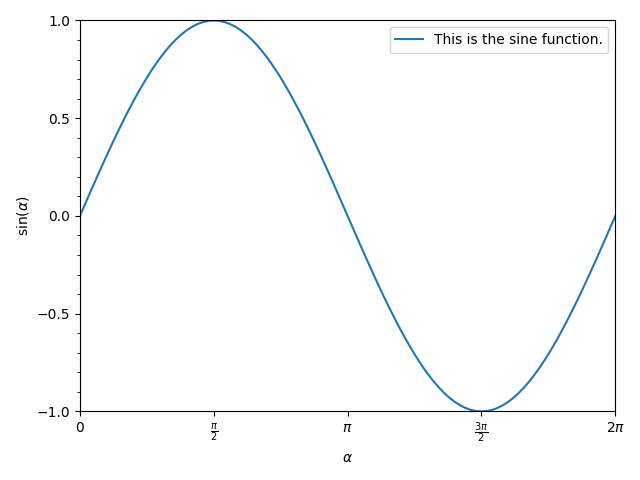

In [93]:
# Example: the final plot looks like this:
fig = matplotlib.pyplot.figure()

In [94]:
# Split the figure into an array of fields: ncols x nrows.
grid = matplotlib.pyplot.GridSpec(ncols=1, nrows=1)

In [95]:
# Add a subplot by specifying column and row.
# You can also use slicing here for combining fields.
ax = fig.add_subplot(grid[0, 0])

In [96]:
# Input data
xval = np.linspace(0., 2.*np.pi, 101)
yval = np.sin(xval)

In [97]:
# Plot the input data:
# Combine the data points with a solid line.
ax.plot(xval, yval, "-", label="This is the sine function.")

In [98]:
# Axes formatting
ax.set_xlim(xval[0], xval[-1])
ax.set_ylim(-1., 1.)

(-1.0, 1.0)

In [99]:
# Set the major ticks location and format of the x-axis.
ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator([0, np.pi/2, np.pi, 3/2*np.pi, 2*np.pi]))
ax.xaxis.set_major_formatter(matplotlib.ticker.FixedFormatter(
    ["$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"]))

In [100]:
# For linear ticks, Matplotlib is pretty good in figuring out the location 
# of minor ticks.
ax.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(numticks=5))
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

In [101]:
# Labels
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$\sin(\alpha)$")

Text(31.097222222222214, 0.5, '$\\sin(\\alpha)$')

In [102]:
# Legend
ax.legend(loc="upper right")

In [103]:
# Shrink the axes in order to fit in the labels.
grid.tight_layout(fig)

In [104]:
# Save the figure.
fig.savefig("example.pdf")

In [105]:
os.remove("example.pdf")

### Creating a matplotlib animation

Matplotlib has the module `matplotlib.animation` which provides functionality to create animated plots.

* After a plot is drawn, an animation function can be defined that updates the artists of the plot.
* The `matplotlib.animation.FuncAnimation` class can be used to animate a function of the form `func(frame_number)`.

Let's animate a point within a plot. The point will move forward on the x-axis.

<IPython.core.display.Javascript object>


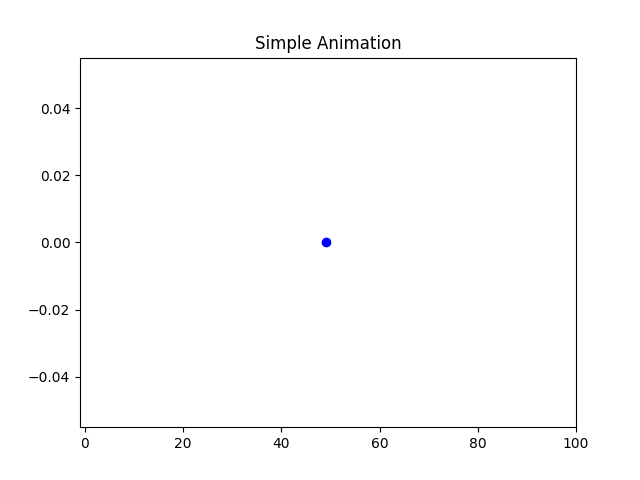

In [106]:
from matplotlib import pyplot as plt
from matplotlib import animation

def draw_point():
    # Plot a blue point at (0,0). The plt.plot function returns a list of Line2D objects.
    point = plt.plot(0, 0, marker='o', color='blue')[0]
    return point

def prepare_animation():
    point = draw_point()
    
    def animate(frame_number):
        point.set_xdata([frame_number])
        return [point]
    
    return animate

(fig, ax) = plt.subplots()
plt.title('Simple Animation')
plt.xlim(-1, 100)

# Prepare the anumation by plotting the point.
animation_func = prepare_animation()

# Animate the animation function.
ani = animation.FuncAnimation(
    fig,
    animation_func,
    frames=50,
    repeat=False,
    blit=True)
plt.show()

# To convert the animation into a HTML5 video one can do:
#from IPython.display import HTML
#HTML(ani.to_html5_video())

<IPython.core.display.Javascript object>


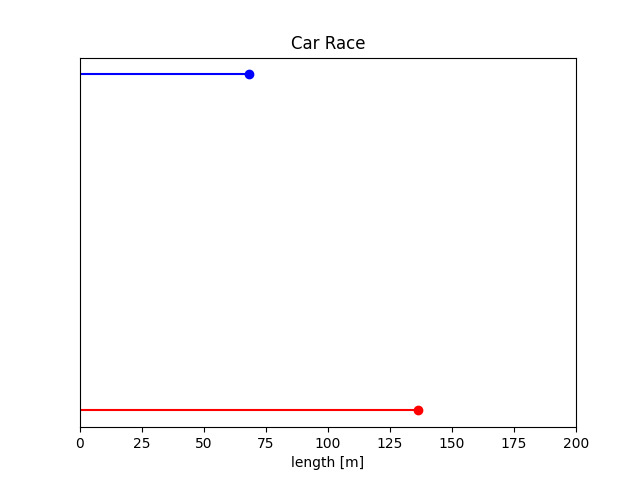

In [107]:
class Car(object):
    def __init__(self, color, v_kmh=50):
        self.x = 0
        self.color = color
        self.v_kmh = v_kmh
    def drive(self, dt):
        v_ms = self.v_kmh * 1000 / (60*60)
        ds = v_ms * dt
        self.x += ds 
        
def draw_car(y, car):
    x = car.x
    color = car.color
    car_line = plt.hlines(y, 0, x, color=color)
    car_marker = plt.plot(x, y, marker='o', color=color)[0]
    return (car_line, car_marker)
    
def prepare_car_animation(ys, cars, fps):
    car_list = cars
    car_line_collection_list = []
    car_marker_list = []
    for (y, car) in zip(ys, car_list):
        (car_line_collection, car_marker) = draw_car(y, car)
        car_line_collection_list.append(car_line_collection)
        car_marker_list.append(car_marker)
    
    def animate(frame_number):
        # Calculate elapsed animation time in seconds.
        dt = 0
        if frame_number > 0:
            t0 = (frame_number-1) / fps
            t1 = frame_number / fps
            dt = t1 - t0
            
        for (i, car) in enumerate(car_list):
            car.drive(dt)
            
            # Update line.
            car_line_collection = car_line_collection_list[i]
            segs = car_line_collection.get_segments()
            segs[0][1,0] = car.x
            car_line_collection.set_segments(segs)
            
            # Update marker.
            car_marker_list[i].set_xdata([car.x])
        
        artists = car_line_collection_list + car_marker_list
        return artists
    
    return animate
    
red_car = Car(color='red', v_kmh=50)
blue_car = Car(color='blue', v_kmh=25)

from matplotlib import pyplot as plt
from matplotlib import animation

(fig, ax) = plt.subplots()
plt.xlim(0, 200)
plt.xlabel('length [m]')
plt.yticks([])
plt.title('Car Race')

fps = 5
time_length = 10 # s

animation_func = prepare_car_animation(
    cars=(red_car, blue_car),
    ys=(1,2),
    fps=fps
)

ani = animation.FuncAnimation(
    fig,
    animation_func,
    frames=int(fps*time_length),
    repeat=False,
    blit=True)

plt.show()
# To convert the animation into a HTML5 video one can do:
#from IPython.display import HTML
#HTML(ani.to_html5_video())

# Working with version control systems (git)

## What is a version control system?

![Version Control](figures/version_control.png)

* Allows to keep track of changes (versions) of files.
* Tracks the history of a file.
* Manages a **repository**, i.e. a collection of files, usually a directory tree.
* Allows collaborating on same files by several people.
    * Conflict resolution
* Allows branching-off from the main development path, i.e. **branches**.
    * Branches can be merged

## What is `git`?

* A version control system developed by the inventor of the Linux kernel, Linus Torvalds.
* A decentralized system
    * repositories are stored locally on the user's computer
    * a central (remote) repository might exists, e.g. github.com

## Cloning a repository

To clone a repository use the `git clone <repo_url>.git <local_dir>` command:

```bash
git clone https://github.com/icecube/skyllh.git skyllh
```

This copies (clones) the **master** branch of the repository from the remote location to the local disk.

## Working with branches

![Git Branches](figures/git_branches.png)

* A branch represents an independent line of development.
* Always use a new branch when making large code changes, e.g. new feature development or bug fix! 

### List available branches
To list all available remote branches type:

```bash
git branch -a
```

### Creating a new branch

To work on a new feature or bug fix, one should create a new branch from the *master* branch.

* Clone the repository.
* Checkout a new branch via the `git checkout -b <branch>` command.

```bash
git clone https://github.com/icecube/skyllh.git skyllh.my_new_feature
cd skyllh.my_new_feature/
git checkout -b my_new_feature
```

After creating the new branch it lives in your local repository. In order to copy it to the remote repository one uses the `git push --set-upstream origin <branch>` command:

```bash
git push --set-upstream origin my_new_feature
```

To see on which branch you are currently working on use

```bash
git branch
```
to get the list of available branches.

## Commiting code changes

After making code changes, these changes must be committed to the branch as a commit.

To see the changed files:

```bash
git status
```

To see the changes of a file:

```bash
git diff <file>
```

To stage a changed file for a commit, use the `git add` command:

```bash
git add <file>
```

To commit all staged files:

```bash
git commit -m "My commit description"
```


## Merging two branches

After a bug was fixed or a new feature was implemented the development branch needs to be merged with the *master* branch.

![Merging two branches](figures/git_branch_merge.png)

* Make sure to be in the correct receiving branch, e.g. master:

```bash
git checkout master
```

* Fetch and pull the latest updates of the receiving branch:

```bash
git fetch
git pull
```

* Marge the feature branch into the master branch:

```bash
git merge my_new_feature
```

* Delete the feature branch:

```bash
git branch -d my_new_feature
```

## Resolving merge conflicts

* Merge conflicts occur when the **same part of the same file** was **changed by both branches**.
* `git merge` will fail before creating the merge commit.
* `git status` will tell where merge conflics are.

```
here is some content not affected by the conflict
<<<<<<< master
this is conflicted text from master
=======
this is conflicted text from my_new_feature branch
>>>>>>> my_new_feature;
```

* Edit the conflicting files to resolve the conflict.
* Stage the changed files with `git add`.
* Perform a final merge commit with `git commit`.

## Pull requests on github.com

* *github.com* provides the functionality to create **pull requests**.
* Pull requests are branches that **ask to be pulled** into the master branch via a merge operation.
* Pull requests can be **code-reviewed** before merging.

# About this document

This notebook can be found on *github.com*:

[https://github.com/martwo/teaching/tree/master/WS_2022_23/advanced_python](https://github.com/martwo/teaching/tree/master/WS_2022_23/advanced_python)

and can be cloned via:

```bash
git clone https://github.com/martwo/teaching.git
```

Converting this notebook into slides and launching a browser window opening them:

```bash
jupyter nbconvert advanced_python.ipynb --to slides --post serve
```